In [42]:
import sys


sys.path.append('..')

In [43]:
import core.Dataset as Dataset

image = Dataset.load_by_path('006.jpeg')

In [44]:
from math import sqrt
from skimage import data, img_as_ubyte
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage.filters import rank
from skimage.morphology import disk

import matplotlib.pyplot as plt

image_gray = rgb2gray(image)
image_gray = rank.median(img_as_ubyte(image_gray), disk(2))

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = [
    f'Laplacian of Gaussian\nAmount: {len(blobs_log)}', 
    f'Difference of Gaussian\nAmount: {len(blobs_dog)}',
    f'Determinant of Hessian\nAmount: {len(blobs_doh)}'
]
sequence = zip(blobs_list, colors, titles)


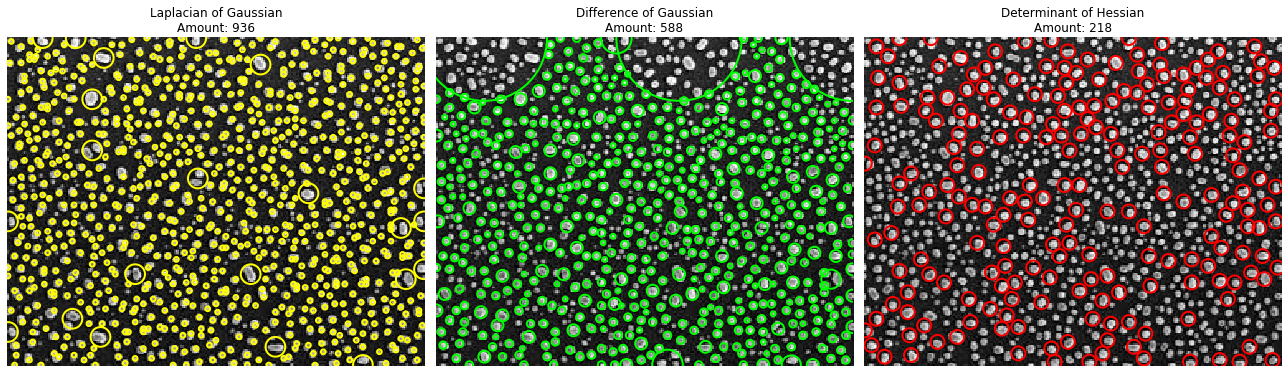

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()
